In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from spellchecker import SpellChecker
import spacy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag


# pip install pyspellchecker
# pip install nltk
# pip install spacy
# !python -m spacy download es_core_news_sm
# pip install wordcloud
# pip install --upgrade pip
# pip install --upgrade Pillow

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Ruta al archivo CSV de Proyectos Finalizados
ruta_archivo = 'C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/proyectos_finalizados_20230706.csv'

# Cargar el archivo CSV en un DataFrame
df1 = pd.read_csv(ruta_archivo)

# Crear una nueva columna llamada 'finalizado' 
df1['finalizado'] = 1

# Mostrar los primeros registros del DataFrame
print(df1.shape)
df1.head()

(4643, 18)


,FONDO,CONCURSO,ANIO,CONTRATO,TITULO,FECHA_INICIO,FECHA_FIN,NOMBRE_SOLICITANTE,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,MONTO_RNR,MONTO_FINANCIERO,MONTO_NO_FINANCIERO,MONEDA,FECHA_CORTE,finalizado
0,FINCYT I,PITEI,2007,001-FINCYT-PITEI-2007,INNOVACION DE LA OFERTA EXPORTABLE DE OREGANO ...,20071228,20120527,AGROINDUSTRIAS CAMBAYA S.A.,ILABAYA,JORGE BASADRE,TACNA,230302.0,135400.0000,0.0000,137100.00,SOLES,20230706.0,1
1,FINCYT I,PITEI,2007,027-FINCYT-PITEI-2007,CULTIVO DE HAEMATOCOCCUS PLUVIALIS PARA LA PRO...,20071221,20101130,ANDEXS BIOTECHNOLOGY - S.R.L. - ANDEXS - S.R.L.,CERRO COLORADO,AREQUIPA,AREQUIPA,40104.0,33985.4100,1089.1500,41200.00,SOLES,20230706.0,1
2,FINCYT I,PITEI,2008,011-FINCYT-PITEI-2008,RED NACIONAL DE COMPARTIMIENTO DE INFORMACION ...,20080325,20101229,LOLIMSA CONSULTORIA DE SISTEMAS S.A.C.,SAN BORJA,LIMA,LIMA,150130.0,309000.0000,102557.8600,49242.14,SOLES,20230706.0,1
3,FINCYT I,PITEI,2008,012-FINCYT-PITEI-2008,SISTEMA DE GESTION DEL SERVICIO DE TAXI-TAXIMART,20080328,20101230,DEVOS INC SAC,SAN MIGUEL,LIMA,LIMA,150136.0,107300.0000,0.0000,30200.00,SOLES,20230706.0,1
4,FINCYT I,PITEI,2008,006-FINCYT-PITEI-2008,CREACION DE UN CENTRO DE PRODUCCION DE EQUIPAM...,20080328,20101229,LOLIMSA CONSULTORIA DE SISTEMAS S.A.C.,SAN BORJA,LIMA,LIMA,150130.0,308300.0000,124000.0000,36000.00,SOLES,20230706.0,1


In [3]:
# Ruta al archivo CSV de Proyectos ene Ejecucion
ruta_archivo = 'C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/proyectos_ejecucion_20230706.csv'

# Cargar el archivo CSV en un DataFrame
df2 = pd.read_csv(ruta_archivo)

# Crear una nueva columna llamada 'finalizado' 
df2['finalizado'] = 0

# Mostrar los primeros registros del DataFrame
print(df2.shape)
df2.head()

(1464, 18)


,FONDO,CONCURSO,ANIO,CONTRATO,TITULO,FECHA_INICIO,FECHA_FIN,NOMBRE_SOLICITANTE,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,MONTO_RNR,MONTO_FINANCIERO,MONTO_NO_FINANCIERO,MONEDA,FECHA_CORTE,finalizado
0,FIDECOM,PIPEI,2014,263-FINCYT-FIDECOM-PIPEI-2014,SISTEMA PILOTO DE ENSAMBLE AUTOMATICO Y SOLDAD...,20141111,20171110,INDUSTRIAS JELCO E.I.R.L.,LIMA,LIMA,LIMA,150101.0,269715.2700,34684.73,39000.0,SOLES,20230706.0,0
1,FIDECOM,PIMEN,2015,390-FIDECOM-PNICP-PIMEN-2015,SERVICIO DE COMUNICACIÓN Y PARTICIPACIÓN VECIN...,20151026,20180425,W & M SECURITY S.A.C.,SAN MARTIN DE PORRES,LIMA,LIMA,150135.0,130022.0400,13987.96,21725.0,SOLES,20230706.0,0
2,FIDECOM,PIMEN,2015,405-FIDECOM-PNICP-PIMEN-2015,ESTANDARIZACION DE UNA TÉCNICA DE CONSERVACIÓN...,20151007,20181006,ALPAQUEL PERU SOCIEDAD ANONIMA CERRADA - ALPAQ...,MIRAFLORES,LIMA,LIMA,150122.0,149955.9400,21264.06,18000.0,SOLES,20230706.0,0
3,FIDECOM,PIMEN,2015,539-FIDECOM-INNOVATEPERU-PIMEN-2015,DISEÑO Y DESARROLLO DE UN SISTEMA MECÁNICO DE ...,20160202,20181001,CURTIEMBRE SANTA ROSA SAC,LA ESPERANZA,TRUJILLO,LA LIBERTAD,130105.0,149854.6700,27928.33,36720.0,SOLES,20230706.0,0
4,FIDECOM,PIMEN,2015,540-FIDECOM-INNOVATEPERU-PIMEN-2015,OBTENCIÓN DE PRODUCTOS CÁRNICOS (HAMBURGUESA Y...,20160107,20181206,ALPAQUEL PERU SOCIEDAD ANONIMA CERRADA - ALPAQ...,MIRAFLORES,LIMA,LIMA,150122.0,149350.8400,20789.16,30400.0,SOLES,20230706.0,0


In [4]:
# Append los DataFrames
data = pd.concat([df1, df2], ignore_index=True)

# Path del nuevo CSV file
ruta_archivo = 'C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/proyectos_com.csv'

# Guardar el DataFrame
data.to_csv(ruta_archivo, index=False)

print("Combined data saved to:", ruta_archivo)

Combined data saved to: C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/proyectos_com.csv


In [5]:
# Usar la base de datos combinada
print(data.shape)
data.head()

(6107, 18)


,FONDO,CONCURSO,ANIO,CONTRATO,TITULO,FECHA_INICIO,FECHA_FIN,NOMBRE_SOLICITANTE,DISTRITO,PROVINCIA,DEPARTAMENTO,UBIGEO,MONTO_RNR,MONTO_FINANCIERO,MONTO_NO_FINANCIERO,MONEDA,FECHA_CORTE,finalizado
0,FINCYT I,PITEI,2007,001-FINCYT-PITEI-2007,INNOVACION DE LA OFERTA EXPORTABLE DE OREGANO ...,20071228,20120527,AGROINDUSTRIAS CAMBAYA S.A.,ILABAYA,JORGE BASADRE,TACNA,230302.0,135400.0000,0.0000,137100.00,SOLES,20230706.0,1
1,FINCYT I,PITEI,2007,027-FINCYT-PITEI-2007,CULTIVO DE HAEMATOCOCCUS PLUVIALIS PARA LA PRO...,20071221,20101130,ANDEXS BIOTECHNOLOGY - S.R.L. - ANDEXS - S.R.L.,CERRO COLORADO,AREQUIPA,AREQUIPA,40104.0,33985.4100,1089.1500,41200.00,SOLES,20230706.0,1
2,FINCYT I,PITEI,2008,011-FINCYT-PITEI-2008,RED NACIONAL DE COMPARTIMIENTO DE INFORMACION ...,20080325,20101229,LOLIMSA CONSULTORIA DE SISTEMAS S.A.C.,SAN BORJA,LIMA,LIMA,150130.0,309000.0000,102557.8600,49242.14,SOLES,20230706.0,1
3,FINCYT I,PITEI,2008,012-FINCYT-PITEI-2008,SISTEMA DE GESTION DEL SERVICIO DE TAXI-TAXIMART,20080328,20101230,DEVOS INC SAC,SAN MIGUEL,LIMA,LIMA,150136.0,107300.0000,0.0000,30200.00,SOLES,20230706.0,1
4,FINCYT I,PITEI,2008,006-FINCYT-PITEI-2008,CREACION DE UN CENTRO DE PRODUCCION DE EQUIPAM...,20080328,20101229,LOLIMSA CONSULTORIA DE SISTEMAS S.A.C.,SAN BORJA,LIMA,LIMA,150130.0,308300.0000,124000.0000,36000.00,SOLES,20230706.0,1


In [6]:
# Proceso demora aprox 1 hora.
# Función para corregir una cadena de texto
def corregir_texto(texto):
    spell = SpellChecker(language='es')
    palabras = texto.split()
    palabras_minusculas = [palabra.lower() for palabra in palabras]
    palabras_corregidas = [spell.correction(palabra) if spell.correction(palabra) is not None else palabra for palabra in palabras_minusculas]
    texto_corregido = ' '.join(palabras_corregidas)
    return texto_corregido

# Aplica la corrección a la columna 'titulo' y crea la columna 'descripcion'
data['descripcion'] = data['TITULO'].apply(corregir_texto)

# Imprime las primeras 10 observaciones de las columnas 'titulo' y 'descripcion'
print(data[['TITULO', 'descripcion']].head(10))

                                              TITULO  \
0  INNOVACION DE LA OFERTA EXPORTABLE DE OREGANO ...   
1  CULTIVO DE HAEMATOCOCCUS PLUVIALIS PARA LA PRO...   
2  RED NACIONAL DE COMPARTIMIENTO DE INFORMACION ...   
3   SISTEMA DE GESTION DEL SERVICIO DE TAXI-TAXIMART   
4  CREACION DE UN CENTRO DE PRODUCCION DE EQUIPAM...   
5  DOMESTICACION DE COMUNIDADES MICROBIANAS ASOCI...   
6  RECUPERACION DE INFORMACION DOCUMENTAL E-ADMIN...   
7  REPRODUCCION EN CAUTIVERIO DE RAYAS (POTRAMOTR...   
8  FABRICACIÓN EN ESCALA PILOTO DE UN GEL REMOVED...   
9  IMPLEMENTACION DE TECNOLOGIAS LIMPIAS PARA MEJ...   

                                         descripcion  
0  innovación de la oferta soportable de orégano ...  
1  cultivo de haematococcus pluviales para la pro...  
2  red nacional de compartimiento de información ...  
3   sistema de gestión del servicio de taxi-taximart  
4  creación de un centro de producción de equipam...  
5  domesticación de comunidades microbiana asocia... 

In [ ]:
# Guardar el DataFrame en un archivo CSV
#ruta_archivo_csv = 'data_modificado.csv'  # Ruta donde deseas guardar el archivo
#data.to_csv(ruta_archivo_csv, index=False)


In [177]:
# Ruta al archivo CSV de Proyectos que guardaste.
final_path = 'C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/proyectos_com_f.csv'

# cargar data 
data = pd.read_csv(final_path)


In [178]:
# Correccion de columnas mal importadas

nuevo_titulo = "IMPLEMENTACIÓN Y CERTIFICACIÓN DEL SISTEMA HACCP PARA LA PRODUCCIÓN Y ENVASADO DE QUESO FRESCO DE LA EMPRESA PRODUCTOS LÁCTEOS NATURALES S.A.C."
data.loc[3036, 'TITULO'] = nuevo_titulo

# Índice de la observación
indice_3036 = 3036

# Valores a reemplazar
nueva_fecha_inicio = "20181004"
nueva_fecha_fin = "20200904"
nuevo_nombre_solicitante = "PRODUCTOS LACTEOS NATURALES S.A.C."
nuevo_distrito = "LA VICTORIA"
nueva_provincia = "CHICLAYO"
nuevo_departamento = "LAMBAYEQUE"
nuevo_ubigeo = "140106"
nuevo_monto_rnr = '9943.76'
nuevo_monto_financiero = '8956.24'
nuevo_monto_no_financiero = '2800'
nueva_moneda = "SOLES"
nueva_fecha_corte = "20230706"

# Actualizar los valores en las columnas correspondientes
data.at[indice_3036, 'FECHA_INICIO'] = nueva_fecha_inicio
data.at[indice_3036, 'FECHA_FIN'] = nueva_fecha_fin
data.at[indice_3036, 'NOMBRE_SOLICITANTE'] = nuevo_nombre_solicitante
data.at[indice_3036, 'DISTRITO'] = nuevo_distrito
data.at[indice_3036, 'PROVINCIA'] = nueva_provincia
data.at[indice_3036, 'DEPARTAMENTO'] = nuevo_departamento
data.at[indice_3036, 'UBIGEO'] = nuevo_ubigeo
data.at[indice_3036, 'MONTO_RNR'] = nuevo_monto_rnr
data.at[indice_3036, 'MONTO_FINANCIERO'] = nuevo_monto_financiero
data.at[indice_3036, 'MONTO_NO_FINANCIERO'] = nuevo_monto_no_financiero
data.at[indice_3036, 'MONEDA'] = nueva_moneda
data.at[indice_3036, 'FECHA_CORTE'] = nueva_fecha_corte


nuevo_titulo = "IMPLEMENTACIÓN Y CERTIFICACIÓN DEL SISTEMA HACCP PARA LA PRODUCCIÓN Y ENVASADO DE QUESO FRESCO DE LA EMPRESA PRODUCTOS LACTEOS NATURALES S.A.C."
data.loc[3453, 'TITULO'] = nuevo_titulo

# Índice de la observación
indice_3453 = 3453

# Valores a reemplazar
nueva_fecha_inicio = "20191012"
nueva_fecha_fin = "20191012"
nuevo_nombre_solicitante = "TRADE SANDDER GROUP S.A.C."
nuevo_distrito = ""
nueva_provincia = ""
nuevo_departamento = ""
nuevo_ubigeo = ""
nuevo_monto_rnr = '5669.68'
nuevo_monto_financiero = '3446' 
nuevo_monto_no_financiero = '7430'
nueva_moneda = "DOLARES"
nueva_fecha_corte = "20230706"

# Actualizar los valores en las columnas correspondientes
data.at[indice_3453, 'FECHA_INICIO'] = nueva_fecha_inicio
data.at[indice_3453, 'FECHA_FIN'] = nueva_fecha_fin
data.at[indice_3453, 'NOMBRE_SOLICITANTE'] = nuevo_nombre_solicitante
data.at[indice_3453, 'DISTRITO'] = nuevo_distrito
data.at[indice_3453, 'PROVINCIA'] = nueva_provincia
data.at[indice_3453, 'DEPARTAMENTO'] = nuevo_departamento
data.at[indice_3453, 'UBIGEO'] = nuevo_ubigeo
data.at[indice_3453, 'MONTO_RNR'] = nuevo_monto_rnr
data.at[indice_3453, 'MONTO_FINANCIERO'] = nuevo_monto_financiero
data.at[indice_3453, 'MONTO_NO_FINANCIERO'] = nuevo_monto_no_financiero
data.at[indice_3453, 'MONEDA'] = nueva_moneda
data.at[indice_3453, 'FECHA_CORTE'] = nueva_fecha_corte

# Índice de la observación
indice_3795 = 3795

# Valores a reemplazar
nueva_fecha_inicio = "20201130"
nueva_fecha_fin = "20211030"
nuevo_nombre_solicitante = "RADIADORES AREQUIPA S.A.C"
nuevo_distrito = "YANAHUARA"
nueva_provincia = "AREQUIPA"
nuevo_departamento = "AREQUIPA"
nuevo_ubigeo = "40126"
nuevo_monto_rnr = '55000'
nuevo_monto_financiero = '0'
nuevo_monto_no_financiero = '16666.67'
nueva_moneda = "SOLES"
nueva_fecha_corte = "20230706"

# Actualizar los valores en las columnas correspondientes
data.at[indice_3795, 'FECHA_INICIO'] = nueva_fecha_inicio
data.at[indice_3795, 'FECHA_FIN'] = nueva_fecha_fin
data.at[indice_3795, 'NOMBRE_SOLICITANTE'] = nuevo_nombre_solicitante
data.at[indice_3795, 'DISTRITO'] = nuevo_distrito
data.at[indice_3795, 'PROVINCIA'] = nueva_provincia
data.at[indice_3795, 'DEPARTAMENTO'] = nuevo_departamento
data.at[indice_3795, 'UBIGEO'] = nuevo_ubigeo
data.at[indice_3795, 'MONTO_RNR'] = nuevo_monto_rnr
data.at[indice_3795, 'MONTO_FINANCIERO'] = nuevo_monto_financiero
data.at[indice_3795, 'MONTO_NO_FINANCIERO'] = nuevo_monto_no_financiero
data.at[indice_3795, 'MONEDA'] = nueva_moneda
data.at[indice_3795, 'FECHA_CORTE'] = nueva_fecha_corte

# Índice de la observación
indice_4964 = 4964

# Valores a reemplazar
nueva_fecha_inicio = ""
nueva_fecha_fin = ""
nuevo_nombre_solicitante = ""
nuevo_distrito = "LINCE"
nueva_provincia = "LIMA"
nuevo_departamento = "LIMA"
nuevo_ubigeo = "150116"
nuevo_monto_rnr = '57500'
nuevo_monto_financiero = '11500'
nuevo_monto_no_financiero = '46000'
nueva_moneda = "SOLES"
nueva_fecha_corte = "20230706"

# Actualizar los valores en las columnas correspondientes
data.at[indice_4964, 'FECHA_INICIO'] = nueva_fecha_inicio
data.at[indice_4964, 'FECHA_FIN'] = nueva_fecha_fin
data.at[indice_4964, 'NOMBRE_SOLICITANTE'] = nuevo_nombre_solicitante
data.at[indice_4964, 'DISTRITO'] = nuevo_distrito
data.at[indice_4964, 'PROVINCIA'] = nueva_provincia
data.at[indice_4964, 'DEPARTAMENTO'] = nuevo_departamento
data.at[indice_4964, 'UBIGEO'] = nuevo_ubigeo
data.at[indice_4964, 'MONTO_RNR'] = nuevo_monto_rnr
data.at[indice_4964, 'MONTO_FINANCIERO'] = nuevo_monto_financiero
data.at[indice_4964, 'MONTO_NO_FINANCIERO'] = nuevo_monto_no_financiero
data.at[indice_4964, 'MONEDA'] = nueva_moneda
data.at[indice_4964, 'FECHA_CORTE'] = nueva_fecha_corte

In [179]:
# Carga el modelo en español de SpaCy
nlp = spacy.load('es_core_news_sm')

# Supongamos que tienes un DataFrame llamado 'data' con la columna 'descripcion' corregida

# Tokeniza las palabras en cada descripción y obtén sus lemas y partes del discurso (POS)
def get_lemmas_and_pos(text):
    doc = nlp(text)
    lemmas_pos = [(token.lemma_, token.pos_) for token in doc]
    return lemmas_pos

data['descripcion_lemmas_pos'] = data['descripcion'].apply(get_lemmas_and_pos)

# Filtra las palabras para quedarte con verbos (VERB) y sustantivos (NOUN)
def filter_verbs_nouns(lemmas_pos_list):
    filtered_words = [lemma.lower() for lemma, pos in lemmas_pos_list if pos == 'VERB' or pos == 'NOUN' or pos == 'ADJ']
    return filtered_words

data['descripcion_filtered'] = data['descripcion_lemmas_pos'].apply(filter_verbs_nouns)

# Cuenta la frecuencia de cada palabra filtrada
word_counts = Counter([word for words in data['descripcion_filtered'] for word in words])

# Obtiene las palabras más comunes y sus frecuencias
most_common_words = word_counts.most_common()

# Imprime las palabras más comunes y sus frecuencias
for word, count in most_common_words:
    print(f"{word}: {count}")

implementación: 1557
sistema: 1433
empresa: 1431
certificación: 1338
gestión: 1162
desarrollo: 1008
calidad: 786
norma: 689
proceso: 675
tecnológico: 468
servicio: 460
producción: 357
mejora: 339
innovación: 328
mercado: 296
digital: 295
tecnología: 277
validación: 263
comercial: 256
prototipo: 251
región: 245
basado: 241
obtención: 240
mejorar: 220
base: 220
producto: 217
seguridad: 217
plataforma: 206
salud: 206
diseño: 204
internacional: 196
sector: 180
aplicación: 176
productivo: 166
misión: 166
alto: 165
nuevo: 165
fortalecimiento: 165
control: 164
beca: 157
productividad: 152
uso: 152
hacer: 148
integrado: 144
web: 144
peruano: 143
fabricación: 142
virtual: 137
nacional: 134
tiempo: 133
industria: 132
cultivo: 130
agua: 130
optimización: 130
cacao: 129
través: 127
orgánico: 125
venta: 125
software: 124
s.a.c.\: 124
café: 123
competitividad: 122
técnico: 122
proyecto: 117
laboratorio: 116
marketing: 115
trabajo: 113
exportación: 110
partir: 109
ambiental: 108
herramienta: 107
líne

inter: 3
comi: 3
lenguado: 3
campesino: 3
gonzal: 3
2008: 3
tradar: 3
unico: 3
magnetico: 3
hilatura: 3
estampado: 3
tilapia: 3
capacitar: 3
litigación: 3
naval: 3
marítimo: 3
pesco: 3
copia: 3
americar: 3
horizonte: 3
sostenido: 3
raiz: 3
tubérculo: 3
xix: 3
omar: 3
digestión: 3
micorriza: 3
convenio: 3
ejecutor: 3
big: 3
manganeso: 3
pimiento: 3
romano: 3
unido: 3
molino: 3
colossomar: 3
micotoxina: 3
tacna\: 3
pablo: 3
karin: 3
larvicultura: 3
sexual: 3
diga: 3
celda: 3
blogs: 3
mauritia: 3
hidrólisis: 3
apto: 3
reacción: 3
costura: 3
acelerar: 3
caracteristica: 3
hospedaje: 3
volubl: 3
defecto: 3
bindi: 3
plantel: 3
envasadora: 3
ostra: 3
giga: 3
cultivar él: 3
spirulín: 3
marina: 3
fijación: 3
capilar: 3
verdura: 3
residir: 3
silicona: 3
valley: 3
normalización: 3
sudamericano: 3
prima: 3
modelamiento: 3
yme: 3
postura: 3
pan: 3
parálisis: 3
techo: 3
proyección: 3
recaudación: 3
placir: 3
personalizabl: 3
inocuo: 3
llevar: 3
femenino: 3
salubridad: 3
norteamericano: 3
semiautomáti

2009: 1
más: 1
politica: 1
fincyt-cayetano: 1
dermatopatologa: 1
sulfato: 1
catastro: 1
cebolla: 1
domicilio: 1
bioarma: 1
as\: 1
zno: 1
guber: 1
elmer: 1
velar: 1
quise: 1
innovacionconvenio: 1
trapich: 1
insumo: 1
n°: 1
oc-pe: 1
rival: 1
desbrozadora: 1
picado: 1
tallo: 1
estrato: 1
policultivo: 1
malasio: 1
fluorométrico: 1
agaricu: 1
noroccidental: 1
enrique: 1
atar: 1
santister: 1
e-marketplace: 1
genérico: 1
multinutricional: 1
pastoral: 1
vega: 1
nadarar: 1
tuberculoso: 1
repoblación: 1
manglar: 1
odioso: 1
leveillular: 1
alcachofas: 1
genera: 1
copitarsia: 1
corrido: 1
maléfico: 1
tumbesino: 1
infiltrado: 1
flecha: 1
coadyar: 1
pregrabado: 1
poda: 1
sistemático: 1
acompañado: 1
pi: 1
desplazamiento: 1
calla: 1
carbon: 1
chapado: 1
helio: 1
aspersa)\: 1
baba: 1
enlatado: 1
inhibir: 1
bioquímica: 1
amoniaco: 1
consumido: 1
desalinización: 1
reconectado: 1
teleradiología\: 1
pre-selección: 1
anti-ulceroso: 1
gastrointestinal: 1
preproducción: 1
establecido: 1
críptex: 1
saa: 1
cru

satipo\: 1
logico: 1
amigo: 1
mercadeo: 1
chefs: 1
sevilla: 1
técnica-coordinación: 1
pés: 1
desborde: 1
rió: 1
agrocredit: 1
mesera: 1
partida: 1
lenteja: 1
ozonificador: 1
gap: 1
silencio: 1
corteza: 1
balneario: 1
actuar: 1
oxapampir: 1
bélgico: 1
maquillado: 1
limitación: 1
cadén: 1
servidumbre: 1
centralizar: 1
vakilact: 1
boreal: 1
auxilio: 1
fotoautotrófico: 1
bilobar: 1
morfologío: 1
fisiológica: 1
plantín: 1
extraordinarios\: 1
sequir: 1
funda: 1
cinta: 1
territorial: 1
molina\: 1
incubagrario: 1
fructoligosacárido: 1
obesidad: 1
alborosea: 1
detrítico: 1
huayco: 1
aplicabilidad: 1
parecer: 1
microfresador: 1
telémetro: 1
dedicación: 1
grúa: 1
picada: 1
esteril: 1
imposible: 1
escanear: 1
teledetención: 1
limpiar: 1
artesanir: 1
discapacitado: 1
iluminar: 1
sinestecico: 1
hidroponir: 1
android: 1
staibac: 1
discal: 1
8a61f : 1
estufa: 1
domestica: 1
reunión: 1
decreto: 1
yanapay: 1
crispar: 1
fisionutricional: 1
síntoma: 1
andropausia: 1
emisora: 1
condesuyo: 1
previsoro: 1
mo

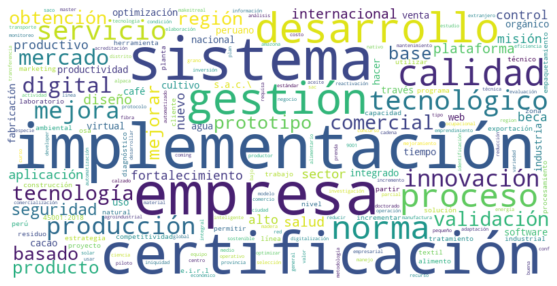

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crea un objeto WordCloud
# Específica una fuente TrueType (TTF) válida
font_path = './arial.ttf'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Muestra el gráfico de nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Guarda la imagen como un archivo PNG
wordcloud.to_file('C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/wordcloud.png')

In [180]:
# Supongamos que tienes un DataFrame llamado 'data' con la columna 'descripcion_filtered'
# Y que has creado una columna nueva llamada 'categoria' para almacenar las etiquetas

# Definir las categorías y sus palabras clave asociadas
categorias = {
    "Comercio Internacional": ["extranjero","internacional","internacionalizar","internacionalizar","exportación","importación",
                               "internacionalización","internacionalizacion","china","chino","argentina","norteamerica","taiwán",
                               "américa","bolivia","india","chile","chileno,""ecuador","canadá","panamá","milán","suizo","agroexportación",
                               "brasilero","brasileño","australiano","norteamerica","austriaco","uruguay","japonés","japón","ruso",
                               "alemán","francés","italiano"],
    "Tecnología 4.0": ["digital","digitalizar","digitalizado","software","plataforma","web",
                   "hardware","digitalización","máquina","sensor","smart","maquinaria","dispositivo","online","videojuego","tic",
                   "robot","microbot","prótesis","computadora","dron","informática","nube","agrotecnología","nanotecnológico",
                   "nanotecnología","tecnologia-pucp","microbot","nanobot","robótica","robotizado","robotizada","robotización",
                   "chatbot-sistema","robóticar","robótico","algoritmo","artificial", "inteligencia","virtual","telecomunicación",
                   "app"],
    "Bio-Tecnología": ["biocombustible","biotecnología","biotecnologío","biotecnológico","biotecnológica","bioplaguicida",
                       "bioplaguicida","plaga","bioinsecticida","biodiesel","biorreactor","biodegradabl","bioquímico",
                       "bioreactor", "biorremediación","micropropagación","microorganismo","orgánico","organico"
                       "genético","genetico","genética","genetica","celular","células","célula","virus","bioproducto"],
    "Medio Ambiente": ["sostenibilidad","medio ambiente","ecologico","energia","ambiente","biodiversidad","cautiverio",
                      "reciclaje", "reciclar","ecología","ecosistema","biodegradabl","biodegradable","ozono","agua","impacto",
                       "contaminación","contaminante","contaminado","contaminant","descontaminación","descontaminadora",
                       "reciclado","forestal","tropical","invernadero","solar","natural"],
    "Certicifaciones":["certificación","certificado","norma","iso","ntp-iso","acreditación","patente","protocolo","evaluación","estándar",
                       "estandarización","estandarizado","estandar","certificar","9001","27001","45001","45001:2018","22000","18001","29110",
                       "37001","17025"],
    "Investigación": ["estudio", "investigación", "piloto", "prototipo", "diagnóstico", "evaluación","laboratorio"],
    "Programas de Becas y formación continua": ["beca","master", "maester", "maestría", "máster" "doctorado", "concurso","curso", "capacitación",
                                   "universidad","formación", "diplomatura","diplomado","académico"],
    "Organizacional y Negocio": ["red","monitoreo", "posicionamiento", "consultoría", "consultor", "asesoramiento", "asistencia técnica", 
                        "know-how","automatización","marketing","transporte","mantenimiento","administración","vigilancia",
                        "gestión","calidad","control","competitividad","productividad","productivo","comercial"],
    "Red innovación": ["feria","evento", "incubadora","simposio", "visita", "incubación", "seminario", "exhibición","divulgación",
                       "vinculación","articulación","consorcio","cooperativa","convenio","cooperación","congreso","foro",
                       "misión","mision"],
    "Social": ["diversidad", "inclusión","social", "mujer", "género","cultural","cultura","discapacidad","discapacitado",
               "discapacitada","intercultural","cinematográfico","artista", "artístico","quechua","artesanía","artesano", "arte",
               "musical","música","musica","comunidad","comunitario","rural"],
    "Medicina": ["medico","médico","medicinal","medicina","enfermedad","salud","farmacéutico","cancer","cáncer","anemia","medicamento",
                 "contagio"]
}

def clasificar_categorias(descripcion_filtered):
    categorias_count = {categoria: 0 for categoria in categorias}
    
    for categoria, palabras_clave in categorias.items():
        for keyword in palabras_clave:
            if any(keyword in word for word in descripcion_filtered):
                categorias_count[categoria] += 1
    
    # Encuentra la primera categoría con recuento mayor que cero
    categorias_encontradas = [categoria for categoria, count in categorias_count.items() if count > 0]
    
    if categorias_encontradas:
        categoria_primaria = categorias_encontradas[0]
        # Encuentra la primera categoría secundaria con recuento mayor que cero
        categoria_secundaria = next((categoria for categoria in categorias_encontradas[1:] if categorias_count[categoria] > 0), "Otra")
    else:
        categoria_primaria = "Otra"
        categoria_secundaria = ""
    
    return categoria_primaria, categoria_secundaria

# Aplicar la función de clasificación a cada fila del DataFrame
data[['categoria_primaria', 'categoria_secundaria']] = data['descripcion_filtered'].apply(clasificar_categorias).apply(pd.Series)

# Mostrar el DataFrame con las nuevas etiquetas
print(data[['descripcion_filtered', 'categoria_primaria', 'categoria_secundaria']])


                                   descripcion_filtered  \
0     [innovación, oferta, soportable, orégano, desh...   
1     [cultivo, haematococcus, pluvial, producción, ...   
2     [red, nacional, compartimiento, información, m...   
3                          [sistema, gestión, servicio]   
4     [creación, centro, producción, equipamiento, m...   
...                                                 ...   
6102             [oil, control, orgánico, hidrocarburo]   
6103  [negosy, software, gestión, nube, yme, persona...   
6104  [implementación, certificación, sistema, gesti...   
6105  [implementación, certificación, sistema, gesti...   
6106  [implementación, certificación, sistema, gesti...   

                           categoria_primaria      categoria_secundaria  
0                                        Otra                            
1                              Bio-Tecnología                      Otra  
2     Programas de Becas y formación continua  Organizacional y Negoc

In [181]:
# Definir la función para calcular el monto total
def calcular_monto_total(row):
    if row['MONEDA'] == 'DOLARES':
        monto_total = (float(row['MONTO_RNR']) + float(row['MONTO_FINANCIERO']) + float(row['MONTO_NO_FINANCIERO'])) * 3.6
    elif row['MONEDA'] == 'SOLES':
        monto_total = float(row['MONTO_RNR']) + float(row['MONTO_FINANCIERO']) + float(row['MONTO_NO_FINANCIERO'])
    else:
        monto_total = 0.0
    return round(monto_total, 2)  # Redondear a dos decimales

# Aplicar la función a cada fila del DataFrame y crear la nueva columna
data['Monto total soles'] = data.apply(calcular_monto_total, axis=1)

# Mostrar el DataFrame con la nueva columna
print(data[['MONEDA', 'MONTO_RNR', 'MONTO_FINANCIERO', 'MONTO_NO_FINANCIERO', 'Monto total soles']])

     MONEDA    MONTO_RNR MONTO_FINANCIERO MONTO_NO_FINANCIERO  \
0     SOLES  135400.0000           0.0000            137100.0   
1     SOLES   33985.4100        1089.1500             41200.0   
2     SOLES  309000.0000      102557.8600            49242.14   
3     SOLES  107300.0000           0.0000             30200.0   
4     SOLES  308300.0000      124000.0000             36000.0   
...     ...          ...              ...                 ...   
6102  SOLES  138833.2200         23417.98             40000.0   
6103  SOLES  150000.0000         21564.41             42840.0   
6104  SOLES   45000.0000          10286.0              6857.0   
6105  SOLES   44995.0000          10290.0              6857.0   
6106  SOLES   44999.0000          10286.0              6857.0   

      Monto total soles  
0             272500.00  
1              76274.56  
2             460800.00  
3             137500.00  
4             468300.00  
...                 ...  
6102          202251.20  
6103       

In [188]:
data.head(5)

,FONDO,CONCURSO,ANIO,CONTRATO,TITULO,FECHA_INICIO,FECHA_FIN,NOMBRE_SOLICITANTE,DISTRITO,PROVINCIA,...,MONTO_NO_FINANCIERO,MONEDA,FECHA_CORTE,finalizado,descripcion,descripcion_lemmas_pos,descripcion_filtered,categoria_primaria,categoria_secundaria,Monto total soles
0,FINCYT I,PITEI,2007,001-FINCYT-PITEI-2007,INNOVACION DE LA OFERTA EXPORTABLE DE OREGANO ...,20071228.0,20120527.0,AGROINDUSTRIAS CAMBAYA S.A.,ILABAYA,JORGE BASADRE,...,137100.00,SOLES,20230706.0,1,innovación de la oferta soportable de orégano ...,"[('innovación', 'NOUN'), ('de', 'ADP'), ('el',...","['innovación', 'oferta', 'soportable', 'orégan...",Otra,NaN,272500.00
1,FINCYT I,PITEI,2007,027-FINCYT-PITEI-2007,CULTIVO DE HAEMATOCOCCUS PLUVIALIS PARA LA PRO...,20071221.0,20101130.0,ANDEXS BIOTECHNOLOGY - S.R.L. - ANDEXS - S.R.L.,CERRO COLORADO,AREQUIPA,...,41200.00,SOLES,20230706.0,1,cultivo de haematococcus pluviales para la pro...,"[('cultivo', 'NOUN'), ('de', 'ADP'), ('haemato...","['cultivo', 'haematococcus', 'pluvial', 'produ...",Bio-Tecnología,Otra,76274.56
2,FINCYT I,PITEI,2008,011-FINCYT-PITEI-2008,RED NACIONAL DE COMPARTIMIENTO DE INFORMACION ...,20080325.0,20101229.0,LOLIMSA CONSULTORIA DE SISTEMAS S.A.C.,SAN BORJA,LIMA,...,49242.14,SOLES,20230706.0,1,red nacional de compartimiento de información ...,"[('red', 'NOUN'), ('nacional', 'ADJ'), ('de', ...","['red', 'nacional', 'compartimiento', 'informa...",Programas de Becas y formación continua,Organizacional y Negocio,460800.00
3,FINCYT I,PITEI,2008,012-FINCYT-PITEI-2008,SISTEMA DE GESTION DEL SERVICIO DE TAXI-TAXIMART,20080328.0,20101230.0,DEVOS INC SAC,SAN MIGUEL,LIMA,...,30200.00,SOLES,20230706.0,1,sistema de gestión del servicio de taxi-taximart,"[('sistema', 'NOUN'), ('de', 'ADP'), ('gestión...","['sistema', 'gestión', 'servicio']",Organizacional y Negocio,Otra,137500.00
4,FINCYT I,PITEI,2008,006-FINCYT-PITEI-2008,CREACION DE UN CENTRO DE PRODUCCION DE EQUIPAM...,20080328.0,20101229.0,LOLIMSA CONSULTORIA DE SISTEMAS S.A.C.,SAN BORJA,LIMA,...,36000.00,SOLES,20230706.0,1,creación de un centro de producción de equipam...,"[('creación', 'NOUN'), ('de', 'ADP'), ('uno', ...","['creación', 'centro', 'producción', 'equipami...",Medicina,Otra,468300.00


In [187]:
#Guardar base final
# Ruta al archivo CSV de Proyectos en Ejecucion
ruta_final = 'C:/Users/Alvaro/Documents/concurso PCM-2023/fin_por proyecto/proyectos_final.csv'

# Guardar el DataFrame
data.to_csv(ruta_final, index=False)

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(ruta_final)

In [186]:
tabla_proyectos = data.groupby(['categoria_primaria']).size().reset_index(name='Cantidad de Proyectos')

# Mostrar la tabla resultante
print(tabla_proyectos)

                         categoria_primaria  Cantidad de Proyectos
0                            Bio-Tecnología                    171
1                           Certicifaciones                   1318
2                    Comercio Internacional                    447
3                             Investigación                    198
4                                  Medicina                     37
5                            Medio Ambiente                    335
6                  Organizacional y Negocio                    454
7                                      Otra                   1154
8   Programas de Becas y formación continua                    157
9                            Red innovación                    100
10                                   Social                     63
11                           Tecnología 4.0                   1673


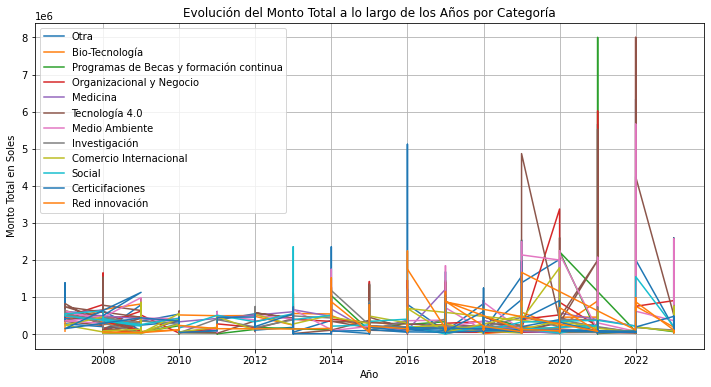

In [210]:
# Tabla 1: Monto total y cantidad de proyectos por categoría principal
tabla_categoria_principal = data.groupby('categoria_primaria').agg({'Monto total soles': 'sum', 'categoria_primaria': 'count'})
tabla_categoria_principal.columns = ['Monto Total', 'Cantidad de Proyectos']
tabla_categoria_principal = tabla_categoria_principal.sort_values(by='Monto Total', ascending=False)

# Tabla 2: Monto total y cantidad de proyectos por categoría secundaria
tabla_categoria_secundaria = data.groupby('categoria_secundaria').agg({'Monto total soles': 'sum', 'categoria_secundaria': 'count'})
tabla_categoria_secundaria.columns = ['Monto Total', 'Cantidad de Proyectos']
tabla_categoria_secundaria = tabla_categoria_secundaria.sort_values(by='Monto Total', ascending=False)

# Tabla 3: Combinaciones más comunes entre categoría primaria y secundaria (excluyendo "Otra" en ambas categorías)
combinaciones_comunes = data[(data['categoria_primaria'] != 'Otra') & (data['categoria_secundaria'] != 'Otra')].groupby(['categoria_primaria', 'categoria_secundaria']).agg({'Monto total soles': ['count', 'sum']})
combinaciones_comunes.columns = ['Cantidad de Proyectos', 'Monto Total']
combinaciones_comunes = combinaciones_comunes.sort_values(by='Cantidad de Proyectos', ascending=False).head(10)

# Tabla 4: Monto total y cantidad de proyectos por departamento
tabla_departamento = data.groupby('DEPARTAMENTO').agg({'Monto total soles': 'sum', 'categoria_secundaria': 'count'})
tabla_departamento.columns = ['Monto Total', 'Cantidad de Proyectos']
tabla_departamento = tabla_departamento.sort_values(by='Monto Total', ascending=False)

#Tabla 5 : 
tabla_anual = data.groupby('ANIO').agg({'Monto total soles': ['sum', 'count']})
tabla_anual.columns = ['Monto Total', 'Cantidad de Proyectos']
tabla_anual = tabla_anual.sort_index()

# Crear un escritor de Excel
with pd.ExcelWriter('tablas_proyectos.xlsx') as writer:
    tabla_categoria_principal.to_excel(writer, sheet_name='Categoria Principal', index=True)

    tabla_categoria_secundaria.to_excel(writer, sheet_name='Categoria Secundaria', index=True)

    combinaciones_comunes.to_excel(writer, sheet_name='Combinaciones Comunes', index=True)
    
    tabla_departamento.to_excel(writer, sheet_name='Departamental', index=True)
    
    tabla_anual.to_excel(writer, sheet_name='Dep_anio', index=True)
